In [1869]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import clear_output
import time 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1870]:
iris_df = pd.read_csv('./data/iris.csv')
mall_df = pd.read_csv('./data/Mall_Customers.csv')

In [1871]:
print(f"Iris datasetet har {iris_df.shape[0]}st datapunkter och {iris_df.shape[1]}st attribut")
print(f"Mall customers datasetet  har {mall_df.shape[0]}st datapunkter och {mall_df.shape[1]}st attribut")

Iris datasetet har 150st datapunkter och 4st attribut
Mall customers datasetet  har 200st datapunkter och 5st attribut


In [1872]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [1873]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [1874]:
print(f'Dubbletter i iris datasetet: {iris_df.duplicated().sum()}')
print(f'Dubbletter i mall customers datasetet: {mall_df.duplicated().sum()}')

Dubbletter i iris datasetet: 1
Dubbletter i mall customers datasetet: 0


In [1875]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [1876]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### I iris så finns det en dubblett som jag ska droppa.
### I Mall customer datasetet så ser vi direkt att vi kan droppa CustomerID

In [1877]:
iris_df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [1878]:
mall_df = mall_df.drop(columns=['CustomerID'])

### I min analys så kommer jag att välja att ha kvar Gender attributet i mall customers datasetet, men beroende på vad man vill få ut av analysen så kan man välja att droppa även det. Men vi behöver först göra om det till kategoriska värden.

In [1879]:
mall_df_with_dummies= pd.get_dummies(mall_df,columns=["Gender"],drop_first=False, dtype=int)

In [1880]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [1881]:
mall_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Jag anser inte att iris datasetet behöver normaliseras eftersom att attributen har liknande skalor och spridning.
### Däremot så tycker jag att mall customers datasetet behöver normaliseras då den har stor spridning och skala mellan attributen och eftersom att jag vill undvika att attribut med större värden ska dominera över de med mindre värden.

In [1882]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(mall_df_with_dummies)
mall_df_with_dummies = pd.DataFrame(normalized_data, columns=mall_df_with_dummies.columns)

### Jag använder mig av sklearns MinMaxScaler för att normalisera datasetet

In [1883]:
mall_df_with_dummies

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,1.0,0.0
196,0.519231,0.909836,0.275510,1.0,0.0
197,0.269231,0.909836,0.744898,0.0,1.0
198,0.269231,1.000000,0.173469,0.0,1.0


### Efter att ha hittat lite olika källor på hur man bygger en Kmeans så har jag nu försökt samla det bästa från alla och skapat en egen, men ett problem som dök upp var just att när man sätter ett högt antal kluster man vill ha så verkar centroidpunkterna få NaN värden eftersom att dom inte får någon datapunkt som är närmst just den. Det verkar finnas olika lösningar på hur man hanterar detta men det som jag gjorde då var att när man uppdaterar centroidpunkterna så tar jag bort dom som blir NaN och då uppdaterar jag self.K i modellen för att det inte ska bråka med övriga funktioner. Anledningen till att jag inte vill ha dom kvar som NaN var för att när man försöker få ner dom i lägre dimensioner med PCA så fungerar det inte med NaN värden.
### Ett annat sätt är att man kan tilldela den en slumpvald datapunkt och på så sätt så kommer den att vara med under nästa tilldelning också, men jag tycker att detta lite bråkar med dom befintliga centroidpunkterna om den helt plötsligt dyker upp, därför valde jag att den försvinner.
### Men med det sagt så verkar det bara dyka upp när man har många antal kluster.

In [1884]:
class Kmeans:
    def __init__(self, n_clusters=3, max_iter=100, algorithm='euclidean', tol=0.0001, plot_iteration=True):
        self.n_clusters = n_clusters
        self.algorithm = algorithm
        self.max_iter = max_iter
        self.tol = tol
        self.plot_iteration = plot_iteration

    def inertia(self):
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = self.X_train[self.clusters == i]
            centroid = self.centroids[i]
            inertia += np.sum(np.square(cluster_points - centroid))
        return inertia

    def initialize_random_centroids(self, X):
        self.num_examples, self.num_features = X.shape
        centroids = np.zeros((self.n_clusters, self.num_features)) 
        for k in range(self.n_clusters): 
            centroid = X[np.random.choice(range(self.num_examples))] 
            centroids[k] = centroid
        return centroids 

    def euc_dist(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1-x2)))
    
    def manhattan_dist(self, x1, x2):
        return np.sum(np.abs(x1 - x2))
    
    def fit(self, X_train):
        self.X_train = X_train
        
        self.centroids = self.initialize_random_centroids(X_train)
        self.clusters = np.zeros(len(X_train))
        for i in range(1,self.max_iter):
            # Update clusters
            self.update_clusters()

            # Update centroids
            early_stop = self.update_centroids()

            if self.plot_iteration:
                self.print_in_realtime(X_train, i)
            
            # Early stopping if converged
            if early_stop==True:
                print(f'Early stopping occured after {i} iterations')
                break
    
    def update_clusters(self):
        for row_idx, train_row in enumerate(self.X_train):
            dist = []
            for i in range(self.n_clusters):
                if self.algorithm.lower() == 'euclidean':
                    dist.append(self.euc_dist(train_row, self.centroids[i]))
                elif self.algorithm.lower() == 'manhattan':
                    dist.append(self.euc_dist(train_row, self.centroids[i]))
                else:
                    raise TypeError("metric must be a euclidean or manhattan")
            self.clusters[row_idx] = np.argmin(np.array(dist))
    
    def update_centroids(self):
        new_centroids = np.copy(self.centroids)
        nan_centroids = []
        for i in range(self.n_clusters):
            cluster_points = self.X_train[self.clusters == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                nan_centroids.append(i)
        for i in nan_centroids:
            new_centroids = np.delete(new_centroids, i, axis=0)
            self.centroids = new_centroids
            self.n_clusters = len(self.centroids)
            return False
        # Check for convergence
        if np.linalg.norm(new_centroids-self.centroids)>self.tol:
            self.centroids = new_centroids
            return False
        else:
            self.centroids = new_centroids
            return True
    
    def predict(self, X_test):
        predictions = np.zeros(len(X_test))
        for row_idx, test_row in enumerate(X_test):
            dist = []
            for i in range(self.n_clusters):
                if self.algorithm.lower() == 'euclidean':
                    dist.append(self.euc_dist(test_row, self.centroids[i]))
                elif self.algorithm.lower() == 'manhattan':
                    dist.append(self.euc_dist(test_row, self.centroids[i]))
                else:
                    raise TypeError("metric must be a euclidean or manhattan")
            predictions[row_idx] = np.argmin(np.array(dist))
        return predictions
    
    def print_in_realtime(self, data, label):
        pca = PCA(n_components=2)
        transformed_data = pca.fit_transform(data)
        centers = pca.transform(self.centroids)
        clear_output(wait=True)
        time.sleep(1)
        plt.title(f'Iteration {label}')
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=self.clusters)
        plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='black')
        plt.show()
        

In [1885]:
model = Kmeans(n_clusters=3)

### Under fit processen så kommer min modell att rita ut varje iteration, mer om detta nedanför varför jag valde att göra så, men man kan sätta plot_iteration=False i modellen för att undvika detta.

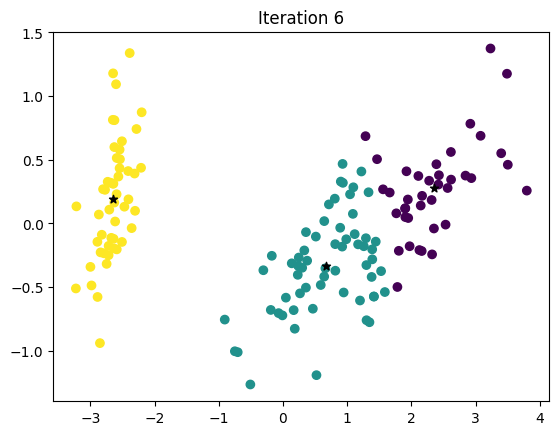

Early stopping occured after 6 iterations


In [1886]:
model.fit(iris_df.values)

In [1887]:
def elbow_method(data):
    sse = []
    for k in range(1,11):
        kmeans = Kmeans(n_clusters=k, plot_iteration=False)
        kmeans.fit(iris_df.values)
        sse.append(kmeans.inertia())

    plt.plot(range(1,11), sse, 'o-')
    plt.xlabel('Antal kluster')
    plt.ylabel('SSE')
    plt.title('Elbow-metoden')
    plt.show()

Early stopping occured after 2 iterations
Early stopping occured after 5 iterations
Early stopping occured after 11 iterations
Early stopping occured after 7 iterations
Early stopping occured after 15 iterations
Early stopping occured after 8 iterations
Early stopping occured after 4 iterations
Early stopping occured after 11 iterations
Early stopping occured after 7 iterations
Early stopping occured after 15 iterations


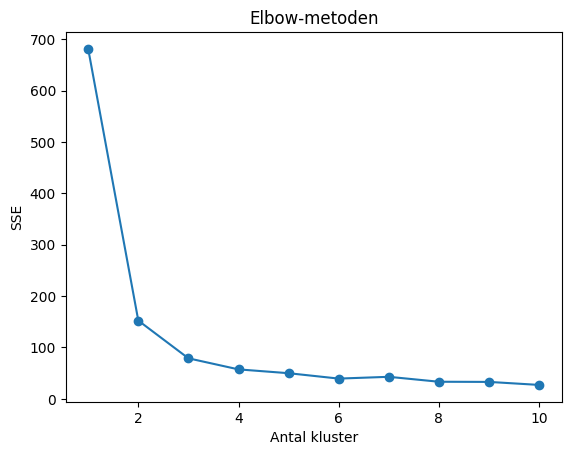

In [1888]:
elbow_method(iris_df.values)

### Efter att ha kört min elbow-funktion ett flertal gånger så finner jag att i iris datasetet så planar den oftast ut som mest vid 3 kluster och det är vad jag finner vara den mest naturliga.

In [1889]:
def scatter_print_2D(data, predictions, model):
        pca = PCA(n_components=2)
        transformed_data = pca.fit_transform(data)
        centers = pca.transform(model.centroids)
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=predictions)
        plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='black')
        plt.show()

In [1890]:
def scatter_print_3D(data, predictions, model):
        pca = PCA(n_components=3)
        transformed_data = pca.fit_transform(data)
        centers = pca.transform(model.centroids)
        fig = plt.figure(figsize=(9,9))
        ax  = plt.axes(projection='3d')
        ax.scatter3D(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=predictions, cmap='rainbow')
        ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='black', cmap='hsv', alpha=1)

In [1891]:
predictions = model.predict(iris_df.values)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


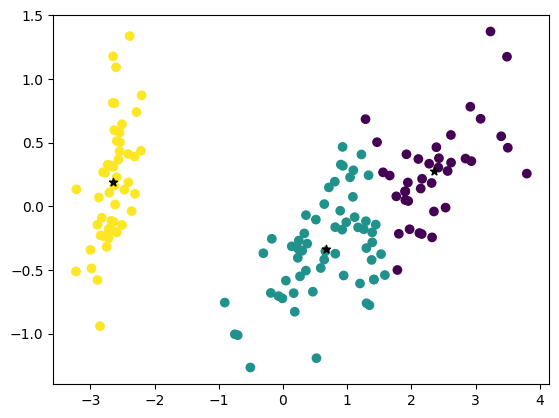

In [1892]:
scatter_print_2D(iris_df,predictions,model)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Nicla\AppData\Local\Temp\ipykernel_25780\1312146969.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='black', cmap='hsv', alpha=1)


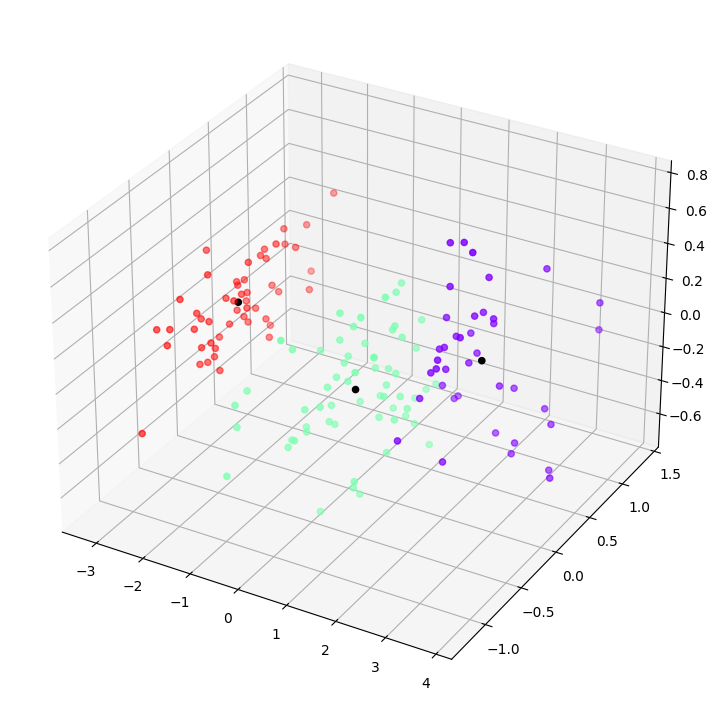

In [1893]:
scatter_print_3D(iris_df,predictions,model)

In [1894]:
model = Kmeans(n_clusters=4)

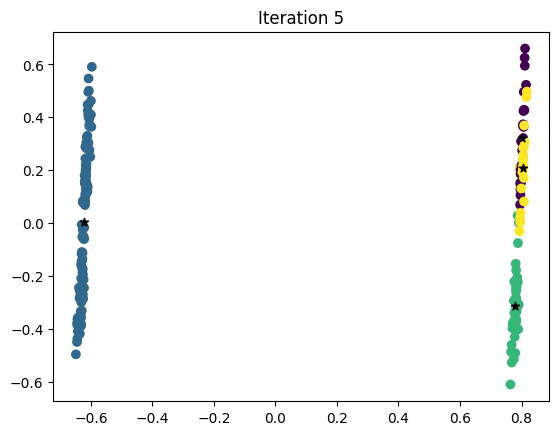

Early stopping occured after 5 iterations


In [1895]:
model.fit(mall_df_with_dummies.values)

Early stopping occured after 2 iterations
Early stopping occured after 4 iterations
Early stopping occured after 4 iterations
Early stopping occured after 14 iterations
Early stopping occured after 5 iterations
Early stopping occured after 4 iterations
Early stopping occured after 7 iterations
Early stopping occured after 8 iterations
Early stopping occured after 7 iterations
Early stopping occured after 7 iterations


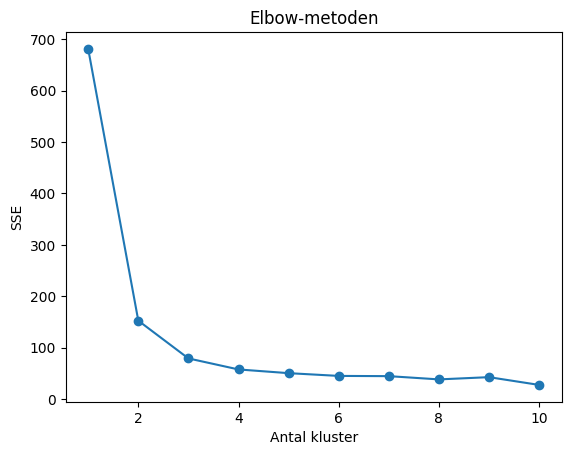

In [1896]:
elbow_method(mall_df_with_dummies.values)

In [1897]:
predictions = model.predict(mall_df_with_dummies.values)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


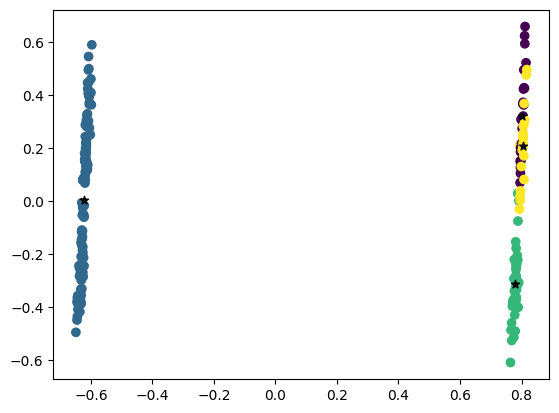

In [1898]:
scatter_print_2D(mall_df_with_dummies, predictions, model)

### Efter att ha normaliserat datasetet så delas datan upp på två olika sidor som ser ut att ha ett jämnt antal data i grafen när det ritas ut, eftersom att min egna modell inte är perfekt och visar lite varierande resultat varje gång så körde jag elbow metoden ett flertal gånger och går på det den visade flest gånger och då planar den ut vid 3 men jag skulle säga att det enklaste att klustra är antingen 2 eller 4 med tanke på hur datan blir visualiserad. Men med detta sagt så när min egna Kmeans slumpar ut centroider vid initiering så om man väljer 4 så kan 3 centroider skapas upp på ena sidan.

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Nicla\AppData\Local\Temp\ipykernel_25780\1312146969.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='black', cmap='hsv', alpha=1)


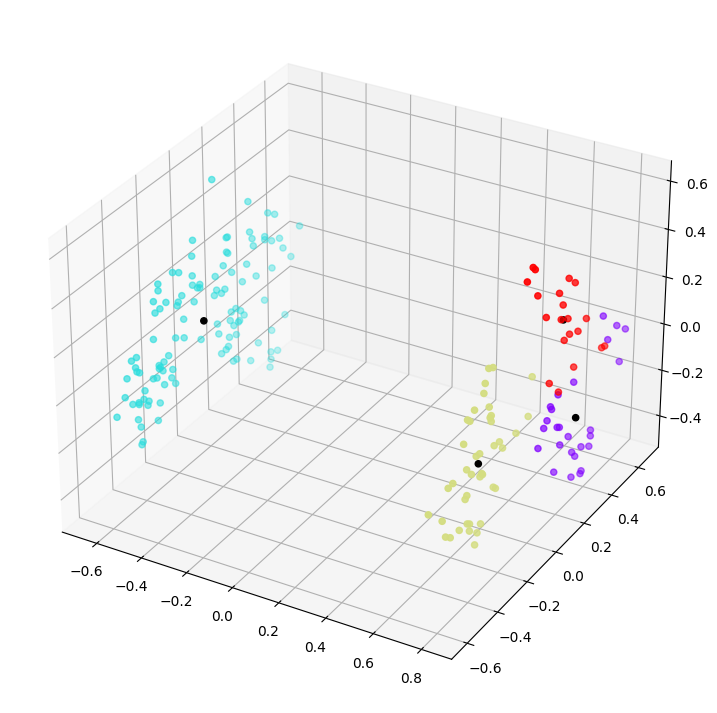

In [1899]:
scatter_print_3D(mall_df_with_dummies, predictions, model)

### Någonting som jag lade märke till när jag ritade ut datapunkterna med klustercentrer var att det kändes som att vissa datapunkter överlappade varandra och att dom hade ett klustercenter som nästan var närmare än den dom hade blivit tilldelad. Jag valde därför att bygga en funktion i min modell som ritar ut för varje iteration vilka kluster punkterna tillhör samt hur centren flyttar på sig. Jag ser även då att detta är något som ibland kan dyka upp och sedan försvinna, jag väljer därför att importera sklearns egna KMeans modell för att se om det dyker upp även där.

In [1900]:
from sklearn.cluster import KMeans

In [1901]:
kmeans = KMeans(n_clusters=6, init='random')
kmeans.fit(mall_df_with_dummies)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=6)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


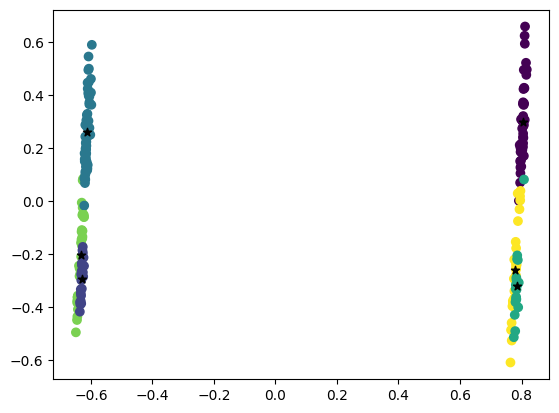

In [1902]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(mall_df_with_dummies)
centers = pca.transform(kmeans.cluster_centers_)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='black')

plt.show()

### Nu när jag har importerat sklearns modell och jämfört fram och tillbaka så kommer jag fram till att när man har (i detta fall) sex eller mer kluster, så förekommer det överlappning av val av kluster för datapunkterna, min hypotetiska slutsats är att detta är någonting som dyker upp under PCA transformen, eftersom att den skalar ner till färre dimensioner så kan det ju vara lite data som försvinner och att dom är nog rätt klassificerade för modellen men att när den ritar ut det så hamnar dom bara på fel plats.